In [47]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from dnn_app_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
dataframe = pd.read_csv('training_data.csv')
dataframe

text          label
0     Mỹ giúp đỡ Việt Nam chống nạn buôn người\nSáng...  chinhtrixahoi
1      Phụ nữ TP.HCM đón nhận Huân chương độc lập hạ...  chinhtrixahoi
2      Nằm lại nơi từng vào sinh ra tử Mọi người chu...  chinhtrixahoi
3      Bị nợ lương, CN lo không có Tết Đại diện công...  chinhtrixahoi
4     Thạc sĩ Phan Huy Củng, Phó phòng Giáo vụ Trườn...  chinhtrixahoi
5      Đà Nẵng: giảm 30% số lượng vàng cho các hộ dâ...  chinhtrixahoi
6     Chào mừng Đại hội Đảng toàn quốc lần thứ X và ...  chinhtrixahoi
7     Nhiều người đi xe bị phạt vì có nồng độ cồn ca...  chinhtrixahoi
8      Trao Huy chương Hữu nghị cho tiến sĩ Burkhard...  chinhtrixahoi
9      Đoàn VN gồm 200 Phật tử sẽ tham dự đại lễ Phậ...  chinhtrixahoi
10    Gần 1.000 học sinh đã đội mưa đến tham gia chư...  chinhtrixahoi
11     Việt Nam-Singapore: Tăng cường quan hệ trên n...  chinhtrixahoi
12     Kiên Giang: một trại cút bị nhiễm virus cúm g...  chinhtrixahoi
13     Phỏng vấn trực tuyến "Y Đức Ngày Nay"\nPhó Tổ...  chinhtrixahoi
14     Công bố hình ảnh thủy thủ bị bắt cóc tại Soma...  chinhtrixahoi
15     Xuất khẩu thủy sản đạt gần 1,9 tỉ USD (NLĐ)- ...  chinhtrixahoi
16    Đó là số tiền các cua-rơ xe đạp người Australi...  chinhtrixahoi
17    LTS: Bài báo Nước Việt Nam nhỏ hay không nhỏ ?...  chinhtrixahoi
18     Phố Đông hiện đại bên bờ sông Sài Gòn\nUBND T...  chinhtrixahoi
19     Khai mạc du lịch hè Nha Trang 2006 \nHàng vạn...  chinhtrixahoi
20     Hai phương án hỗ trợ các hộ dân chưa di dời t...  chinhtrixahoi
21     Một người Vân Kiều vét gia sản tìm nước sạch ...  chinhtrixahoi
22     \nChiều qua 21/4, Thủ tướng Phan Văn Khải đã ...  chinhtrixahoi
23     Sớm mở rộng quy hoạch các đô thị Bắc Bộ (NLĐ)...  chinhtrixahoi
24     Sôi nổi lễ hội truyền thống trên miền đất Tổ ...  chinhtrixahoi
25     Canada hỗ trợ VN phòng chống các bệnh truyền ...  chinhtrixahoi
26     10.000 hộ dân cù lao Lợi Quan thiếu nước \nÔn...  chinhtrixahoi
27    Để nhận biết "Việt Nam ta nhỏ hay không nhỏ", ...  chinhtrixahoi
28     Thông qua 7 ưu tiên trong Năm APEC 2006 do VN...  chinhtrixahoi
29    Từ ngày 14.3 - 17.3, chương trình Tư vấn mùa t...  chinhtrixahoi
...                                                 ...            ...
1970  Hầu hết làng nghề thiếu thông tin thị trường\n...      kinhdoanh
1971  Hàng quán Hà Nội đắt khách dịp đầu năm\nNgay t...      kinhdoanh
1972  Đất khu đô thị mới Phú An hút khách\nTheo các ...      kinhdoanh
1973  Australia tiếp cận thị trường ASEAN\nAustralia...      kinhdoanh
1974  Đàm phán song phương với EU kết thúc thắng lợi...      kinhdoanh
1975  Các doanh nghiệp dệt may đề nghị tăng thời gia...      kinhdoanh
1976  Honda VN tung ra hai mẫu xe mới\nFuture II có ...      kinhdoanh
1977  100.000 tấn gạo xuất khẩu cho đầu năm 2005\nTh...      kinhdoanh
1978   Siêu thị bán lẻ giá gốc Bán lẻ giá sỉ tại siê...      kinhdoanh
1979  Trầm lắng thị trường thép\nTheo Trung tâm thôn...      kinhdoanh
1980   Đang thông sao lại chặn?\nĐồng thời nơi này c...      kinhdoanh
1981  Hà Nội bán hồ sơ đấu giá quyền sử dụng đất quậ...      kinhdoanh
1982   Giá dầu lên trên 75 USD/thùng\nTại thị trường...      kinhdoanh
1983  Hà Nội sắp mở trung tâm xúc tiến thương mại tạ...      kinhdoanh
1984  Quảng cáo Thái Lan bội thu nhờ dịch cúm\nGiới ...      kinhdoanh
1985  Giá vàng leo thang, USD tụt dốc\nNhững gì mà c...      kinhdoanh
1986  Giá cả leo thang chỉ là nhất thời'\nTS Susan A...      kinhdoanh
1987  Mở cửa thị trường dịch vụ Internet - chưa có b...      kinhdoanh
1988  Ngày 15/3 cổ phiếu bông Bạch Tuyết lên sàn\nCổ...      kinhdoanh
1989  Lập trung tâm giao dịch vàng Hà Nội và TP HCM\...      kinhdoanh
1990  Các nước nghèo kêu gọi phương Tây giảm thuế qu...      kinhdoanh
1991  Đưa 19 mặt hàng ôtô, môtô vào thực hiện CEPT\n...      kinhdoanh
1992  Siêu thị tại Hà Nội ráo riết bán hàng Tết\nMua...      kinhdoanh
1993  Boeing bán máy bay cho New Zealand\nHãng hàng ...      kinhdoanh
1994  Mỹ lạc quan với tỷ lệ việc làm mới\nBộ Lao độn...      kinhdoanh
1995

In [49]:
# split the dataset into training and test datasets 
train_x, test_x, train_y, test_y = model_selection.train_test_split(dataframe['text'], dataframe['label'])

In [50]:
# one hot coding
encoder = preprocessing.OneHotEncoder(sparse=False,handle_unknown='ignore')
train_y = encoder.fit_transform(np.array(train_y).reshape(-1,1)) # training label
test_y = encoder.fit_transform(np.array(test_y).reshape(-1,1))
print('["chinhtrixahoi" "doisong" "khoahoc" "kinhdoanh"] labels corresponds to %s labels' %encoder.fit_transform([["chinhtrixahoi"], ["doisong"], ["khoahoc"], ["kinhdoanh"]]))
print(train_y.shape)
print(train_y)
print(test_y.shape)
print(test_y)

["chinhtrixahoi" "doisong" "khoahoc" "kinhdoanh"] labels corresponds to [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] labels
(1500, 4)
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
(500, 4)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [51]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

# transform training vector to tfidf vector
tfidf_vect.fit(dataframe['text'])

xtrain_tfidf =  tfidf_vect.transform(train_x)
print('Tfidf training vector:')
print(xtrain_tfidf.shape)
print('Number of training documents: %s' %(xtrain_tfidf.shape[0]))
print('Number of features of each document: %s' %(xtrain_tfidf.shape[1]))
print(str(xtrain_tfidf))
xtest_tfidf =  tfidf_vect.transform(test_x)
print('Tfidf test vector:')
print(xtest_tfidf.shape)
print('Number of test documents: %s' %(xtest_tfidf.shape[0]))
print('Number of features of each document: %s' %(xtest_tfidf.shape[1]))
print(str(xtest_tfidf))

Tfidf training vector:
(1500, 5000)
Number of training documents: 1500
Number of features of each document: 5000
  (0, 4991)	0.013964487351805647
  (0, 4988)	0.035810683756900316
  (0, 4960)	0.02626022349019059
  (0, 4950)	0.03403278840688626
  (0, 4922)	0.03182690134582118
  (0, 4917)	0.017069187805583586
  (0, 4904)	0.033596112778480736
  (0, 4898)	0.026451004241274167
  (0, 4894)	0.022257291155463283
  (0, 4893)	0.0697108397697869
  (0, 4888)	0.030641652129087885
  (0, 4854)	0.02703414362933691
  (0, 4847)	0.011690921603918719
  (0, 4826)	0.03096611680578557
  (0, 4822)	0.041471911804632965
  (0, 4816)	0.02514429827278663
  (0, 4807)	0.01204678059102462
  (0, 4806)	0.017930018409852172
  (0, 4805)	0.030444113857924955
  (0, 4790)	0.2936992321867012
  (0, 4774)	0.03121661363032724
  (0, 4759)	0.017109992165865177
  (0, 4751)	0.018872566236414565
  (0, 4735)	0.017985681568118896
  (0, 4727)	0.04341309810399345
  :	:
  (1499, 853)	0.030809063215623638
  (1499, 826)	0.04444184572276135


In [52]:
# use toarray() to convert sparse to dense matrix 
xtrain_tfidf =  xtrain_tfidf.T.toarray()
print(xtrain_tfidf.shape)
print(xtrain_tfidf)
xtest_tfidf =  xtest_tfidf.T.toarray()
print(xtest_tfidf.shape)
print(xtest_tfidf)

(5000, 1500)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.184901   0.04217693 0.15354138]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(5000, 500)
[[0.         0.15755346 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.08235471 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [53]:
### CONSTANTS ###
layers_dims = [5000, 20, 7, 5, 4] #  4-layer model

In [54]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 5000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    shape_of_AL = AL.shape
    return parameters, shape_of_AL

Cost after iteration 0: 1.385473
Cost after iteration 100: 1.330115
Cost after iteration 200: 1.134651
Cost after iteration 300: 0.919505
Cost after iteration 400: 0.749068
Cost after iteration 500: 0.601633
Cost after iteration 600: 0.474646
Cost after iteration 700: 0.372545
Cost after iteration 800: 0.294954
Cost after iteration 900: 0.235626
Cost after iteration 1000: 0.189261
Cost after iteration 1100: 0.152695
Cost after iteration 1200: 0.126410
Cost after iteration 1300: 0.110422
Cost after iteration 1400: 0.101140
Cost after iteration 1500: 0.094908
Cost after iteration 1600: 0.090677
Cost after iteration 1700: 0.087779
Cost after iteration 1800: 0.085501
Cost after iteration 1900: 0.083527
Cost after iteration 2000: 0.081756
Cost after iteration 2100: 0.080115
Cost after iteration 2200: 0.078525
Cost after iteration 2300: 0.076975
Cost after iteration 2400: 0.074398
Cost after iteration 2500: 0.072583
Cost after iteration 2600: 0.069357
Cost after iteration 2700: 0.066791
Cost

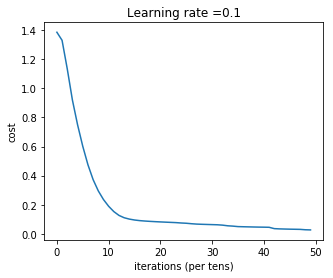

In [55]:
parameters, shape_of_AL  = L_layer_model(xtrain_tfidf, train_y, layers_dims, num_iterations = 5000, print_cost = True)

In [56]:
shape_of_AL

(4, 1500)

In [57]:
len(parameters)

8

In [58]:
print("Shape of W1")
print(parameters["W1"].shape)
print("Shape of b1")
print(parameters["b1"].shape)
print("Shape of W2")
print(parameters["W2"].shape)
print("Shape of b2")
print(parameters["b2"].shape)
print("Shape of W3")
print(parameters["W3"].shape)
print("Shape of b3")
print(parameters["b3"].shape)
print("Shape of W4")
print(parameters["W4"].shape)
print("Shape of b4")
print(parameters["b4"].shape)

Shape of W1
(5000, 20)
Shape of b1
(20, 1)
Shape of W2
(20, 7)
Shape of b2
(7, 1)
Shape of W3
(7, 5)
Shape of b3
(5, 1)
Shape of W4
(5, 4)
Shape of b4
(4, 1)


In [59]:
pred_train = predict(xtrain_tfidf, train_y, parameters)

(1500,)
[1 2 1 ... 3 0 2]
(1500,)
[1. 2. 1. ... 3. 0. 2.]
Accuracy: 0.9953333333333333


In [60]:
pred_test = predict(xtest_tfidf, test_y, parameters)

(500,)
[1 3 2 2 2 3 1 0 2 1 0 2 0 2 0 0 1 2 1 0 0 3 3 1 1 0 3 3 1 0 3 1 0 1 1 1 1
 0 1 3 2 0 2 2 2 3 0 0 3 3 3 0 1 0 2 1 3 1 3 2 0 0 2 2 2 1 2 1 1 1 3 3 3 0
 2 0 2 2 2 1 0 0 0 0 2 2 1 0 0 0 0 0 0 1 3 0 2 2 2 0 3 0 1 0 1 0 0 2 2 2 1
 0 2 3 0 2 1 0 3 0 0 2 0 2 1 2 2 2 3 1 2 2 1 0 1 2 3 0 3 3 2 0 3 2 1 2 2 3
 2 3 1 0 3 2 0 3 2 3 1 2 2 3 2 3 0 3 0 0 3 1 1 2 0 0 0 1 1 1 1 2 2 0 0 3 2
 3 2 2 0 1 0 3 2 3 0 0 0 0 1 1 1 2 0 0 3 1 2 3 2 1 3 0 2 1 3 0 1 0 3 1 2 3
 2 0 3 0 1 0 2 3 0 2 3 1 0 2 1 2 2 3 3 2 1 3 0 2 2 0 3 3 0 0 2 3 3 2 2 3 0
 0 2 3 0 3 3 2 1 1 2 2 0 2 0 2 2 1 0 3 0 2 0 3 1 3 2 2 0 0 2 2 2 0 0 0 3 0
 0 1 2 0 0 3 3 3 0 2 3 1 3 2 3 2 0 3 2 0 1 1 0 1 3 0 2 3 3 3 0 3 0 1 3 3 1
 0 2 0 0 3 1 0 0 0 2 3 3 3 1 0 2 2 0 0 3 1 0 0 3 1 1 3 0 1 1 3 3 2 2 3 1 0
 2 3 0 1 3 2 3 2 3 0 0 0 1 3 0 2 3 1 3 3 1 1 1 3 2 0 1 2 3 3 0 2 1 0 3 3 0
 2 3 0 2 3 0 1 0 0 3 3 2 3 3 1 3 1 0 0 1 1 0 0 0 3 1 0 2 2 3 3 2 0 0 2 3 1
 3 3 1 2 0 0 1 2 3 1 2 2 1 1 1 3 1 2 3 2 0 1 2 0 3 3 1 1 2 0 2 2 3 1 3 2 3
 1 1 1 3 2 0 2 1 1